In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\saran\Downloads\data_stocks.csv')
df.shape

(41266, 502)

In [3]:
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
df

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-01 00:00:01.491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,84.370,119.035,44.400,39.880,82.030,7.360,50.220,63.86,122.000,53.3500
1,1970-01-01 00:00:01.491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,84.370,119.035,44.110,39.880,82.030,7.380,50.220,63.74,121.770,53.3500
2,1970-01-01 00:00:01.491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,84.585,119.260,44.090,39.980,82.020,7.360,50.120,63.75,121.700,53.3650
3,1970-01-01 00:00:01.491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,84.460,119.260,44.250,39.990,82.020,7.350,50.160,63.88,121.700,53.3800
4,1970-01-01 00:00:01.491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,84.470,119.610,44.110,39.960,82.030,7.360,50.200,63.91,121.695,53.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,1970-01-01 00:00:01.504209360,2472.2200,44.7200,164.1100,155.0900,83.670,106.5650,114.4900,47.150,142.425,...,99.675,99.530,49.485,40.955,76.360,32.285,62.110,76.88,114.310,62.7250
41262,1970-01-01 00:00:01.504209420,2471.7700,44.7300,164.1200,155.1600,83.650,106.5900,114.5200,47.150,142.450,...,99.730,99.630,49.480,40.960,76.370,32.295,62.100,76.90,114.330,62.7100
41263,1970-01-01 00:00:01.504209480,2470.0300,44.7400,164.0100,155.0650,83.620,106.5200,114.4700,47.150,142.330,...,99.735,99.640,49.495,40.940,76.315,32.290,62.090,76.88,114.310,62.6850
41264,1970-01-01 00:00:01.504209540,2471.4900,44.7100,163.8800,154.9600,83.580,106.4000,114.3300,47.135,142.170,...,99.700,99.630,49.485,40.925,76.300,32.275,62.075,76.83,114.230,62.6301


In [6]:
df.drop(['DATE','SP500'],axis=1,inplace=True)

In [7]:
sse = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df)
    sse.append(kmean.inertia_)

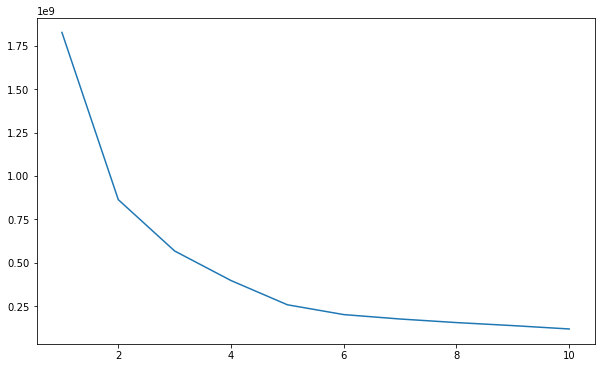

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse)

In [9]:
kmean = KMeans(n_clusters=5)
kmean.fit(df)

KMeans(n_clusters=5)

In [10]:
label = kmean.labels_

In [11]:
silhouette_score(df,label)

0.5102450875430561

In [12]:
df['label'] = label

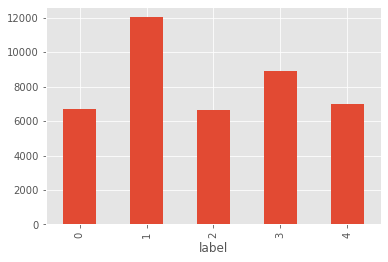

In [13]:
plt.style.use('ggplot')
df.groupby(['label']).agg('size').plot.bar()

In [14]:
# Problem 1:
# There are various stocks for which we have collected a data set, which all stocks are
# apparently similar in performance

# Problem 2:
# How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.



# solution 1 :
# so based on clustering , # records residing in the cluster 3,4 & 0 are similar in performance


# solution 2 :
# so based on clustering approach , we can divide all the data set into 5 cluster according to their performance

In [15]:
# conclusion : 

# most of the records are belongs to cluster 1

In [16]:
# Problem 3:
# Identify which all stocks are moving together and which all stocks are different from
# each other.


# solution
# we will apply PCA to find out wich stock correlated with each other

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
scale = StandardScaler()
x = scale.fit_transform(df)

In [19]:
EVR = []
pca = PCA()
pca.fit(x)
EVR.append(pca.explained_variance_ratio_)

Text(0.5, 1.0, 'Explained Variance ratio by no of feature')

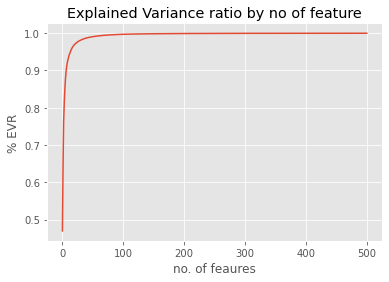

In [20]:
plt.figure()
plt.plot(np.cumsum(EVR))
plt.xlabel('no. of feaures')
plt.ylabel('% EVR')
plt.title('Explained Variance ratio by no of feature')

In [21]:
pca = PCA(n_components=25)
new_df = pca.fit_transform(x)

In [22]:
new_df = pd.DataFrame(data=new_df)

In [23]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,25.557817,10.152031,-9.349033,-2.971486,-1.474137,-1.763869,-0.807834,-3.789026,4.258434,1.633022,...,-2.580931,-1.300927,-0.720788,1.840079,2.550257,3.758037,-0.705280,0.517556,-0.168177,2.559244
1,25.656453,10.042294,-9.768311,-2.559245,-1.420781,-1.951833,-0.922538,-3.773103,4.081504,1.562364,...,-2.675927,-1.109411,-0.684159,1.813959,2.577442,3.627674,-0.773390,0.414574,-0.112587,2.507352
2,25.571102,9.974310,-9.644003,-2.861353,-1.511362,-1.864422,-0.858939,-3.856301,4.103665,1.669759,...,-2.469000,-1.174208,-0.790121,1.737009,2.634360,3.601918,-0.973793,0.493889,-0.209370,2.223678
3,25.676233,10.139066,-9.141571,-3.051198,-1.376474,-1.956331,-0.761473,-3.884253,4.110414,1.758354,...,-2.325492,-1.158027,-0.889728,1.727435,2.509068,3.637797,-0.975904,0.527027,-0.161123,2.088225
4,25.588235,10.025772,-9.480433,-2.844725,-1.306843,-1.965775,-0.854591,-4.072006,4.132542,1.701004,...,-2.437235,-1.165489,-0.857809,1.747756,2.449493,3.606478,-0.985839,0.451783,-0.146015,2.028829


In [25]:
# conclusion : these 25 stocks are which moving togather